#### DESAFIO: AVALIAÇÃO DE CLIENTES DE UM BANCO



O Cenário

A avaliação do risco de inadimplência tem um papel importante para os bancos e outros órgãos por estar associada a possíveis perdas e gerar grande impacto nas atividades do mercado financeiro. Fazer uma avaliação certeira permite que empréstimos sejam concedidos com menor risco a mais pessoas, minimiza a perda da instituição relativa a inadimplência, contribuindo para uma movimentação na economia e para um melhor resultado para a empresa.

O Problema

Diante desse cenário, o Desafio proposto tem como objetivo auxiliar a Área de Negócios de um banco brasileiro na tarefa de melhorar seu modelo de predição de Inadimplência de um novo cliente. No caso, um modelo preditivo que prevê se o tomador será um bom pagador baseado em características de clientes passados contidas nesta base de dados.
O primeiro passo para isso é conhecer melhor sua base de dados histórica de tomadores de crédito e avaliá-la com o propósito de sua posteriormente utilização para a construção e estimação de um modelo analítico de previsão de inadimplência.

A Base

A base de dados disponibilizada contém o histórico de Crédito concedido com a informação de pagamento, e variáveis relacionadas aos clientes. É um conjunto de dados grande e acredita-se que este possui diversas informações potencialmente úteis para o aprendizado do modelo em questão. Além disso, também está disponibilizado um arquivo contendo a descrição das variáveis.

A Tarefa

O que esperamos nesse momento é que você, como Cientista de Dados responsável pelo projeto apresente uma Análise Exploratória dos Dados disponibilizados e exponha seus resultados em uma apresentação clara e objetiva, incluindo todo comentário que achar relevante.

Pontos Esperados

1) Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários;

2) Apresente as características das variáveis envolvidas, descrevendo seu potencial como variável preditora e potenciais dificuldades em sua utilização no modelo;

3) Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes;

4) Apresente e discuta eventuais relações entre as variáveis, tais como dependência, correlação, informação mútua, associações etc.;

5) Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados;

6) Examine e discuta o impacto de cada variável na base de dados na previsão da inadimplência do cliente, elencando quais variáveis são aparentemente mais importantes a definição de bom ou mal pagador; e

7) Inclua qualquer outra informação/análise que achar importante.

#### Importação

In [1]:
# Importando as bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Importando as bibliotecas de visualização de dados
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando os dados
df = pd.read_csv('df_criado_final.csv')
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587.0,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254.0,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519.0,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138.0,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504.0,0,2020-01-01,59


#### Leitura

In [3]:
df.describe(include='all')

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
count,14615.000000,9768.000000,50390,50390.000000,50390.000000,50390,50390,21843.000000,12806.000000,50390,...,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04,50390.000000,50390.0,5.039000e+04,50390.000000,50390,50390.000000
unique,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,N,NaN,NaN,S,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,NaN
freq,NaN,NaN,32248,NaN,NaN,42730,49211,NaN,NaN,38799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50390,NaN
mean,1.175573,4635.610641,NaN,3.503354,31.724529,NaN,NaN,2.104931,1.241605,NaN,...,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05,0.790891,1.0,3.740829e+09,0.498333,NaN,57.498055
std,0.508951,24776.361024,NaN,2.132091,8.565117,NaN,NaN,0.898459,0.496176,NaN,...,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06,0.406676,0.0,7.248462e+09,0.500002,NaN,1.118008
min,1.000000,0.009600,NaN,1.000000,18.000000,NaN,NaN,1.000000,1.000000,NaN,...,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03,0.000000,1.0,1.168846e+06,0.000000,NaN,56.000000
25%,1.000000,28.173400,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.000000,NaN,...,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03,1.000000,1.0,1.383124e+06,0.000000,NaN,56.000000
50%,1.000000,186.004900,NaN,2.000000,30.000000,NaN,NaN,2.000000,1.000000,NaN,...,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03,1.000000,1.0,1.439557e+06,0.000000,NaN,57.000000
75%,1.000000,1159.021800,NaN,4.000000,35.000000,NaN,NaN,2.000000,1.000000,NaN,...,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04,1.000000,1.0,4.699642e+07,1.000000,NaN,58.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

Já nessa primeira breve análise podemos verificar que algumas colunas tem um mesmo valor em todas as linhas: **Controle, Data**

Temos duas colunas que tem apenas valores nulos: **Valor Conta corrente, Valor Conta Poupanca**

E outras colunas tem alto número de valores nulos, mas não são 100% compostas pelos mesmos, mas é algo que abordaremos posteriormente.

<AxesSubplot:>

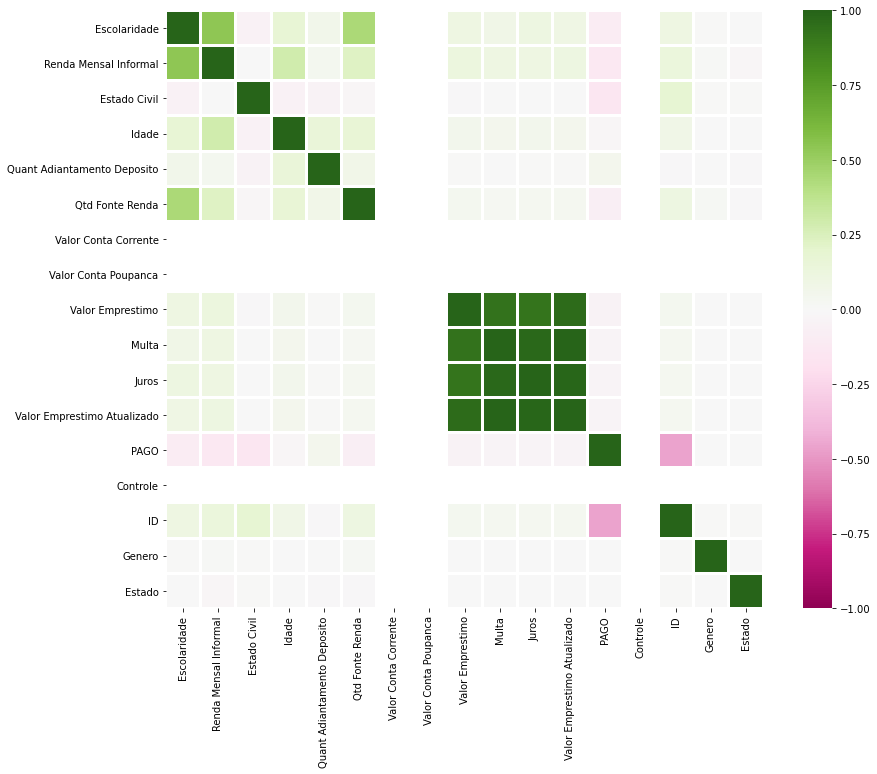

In [5]:
# Vamos fazer uma análise macro sobre possíveis correlações
plt.figure(figsize=(14, 11))
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap="PiYG",square=True, linewidths=2)

Podemos observar que existe uma variação na correlação entre os dados dos mesmos grupos (categóricos/não categóricos) quando observamos os mesmos individualmente ou com um dataframe único. Algo que pode ser a causa disso, é o fato de termos muitos valores nulos, já que isso tem influência direta no número de linhas e colunas análisadas nas correlações.

##### Apresente as características das variáveis envolvidas, descrevendo seu potencial como variável preditora e potenciais dificuldades em sua utilização no modelo;

In [6]:
df.describe(include='all')

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
count,14615.000000,9768.000000,50390,50390.000000,50390.000000,50390,50390,21843.000000,12806.000000,50390,...,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04,50390.000000,50390.0,5.039000e+04,50390.000000,50390,50390.000000
unique,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,N,NaN,NaN,S,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,NaN
freq,NaN,NaN,32248,NaN,NaN,42730,49211,NaN,NaN,38799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50390,NaN
mean,1.175573,4635.610641,NaN,3.503354,31.724529,NaN,NaN,2.104931,1.241605,NaN,...,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05,0.790891,1.0,3.740829e+09,0.498333,NaN,57.498055
std,0.508951,24776.361024,NaN,2.132091,8.565117,NaN,NaN,0.898459,0.496176,NaN,...,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06,0.406676,0.0,7.248462e+09,0.500002,NaN,1.118008
min,1.000000,0.009600,NaN,1.000000,18.000000,NaN,NaN,1.000000,1.000000,NaN,...,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03,0.000000,1.0,1.168846e+06,0.000000,NaN,56.000000
25%,1.000000,28.173400,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.000000,NaN,...,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03,1.000000,1.0,1.383124e+06,0.000000,NaN,56.000000
50%,1.000000,186.004900,NaN,2.000000,30.000000,NaN,NaN,2.000000,1.000000,NaN,...,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03,1.000000,1.0,1.439557e+06,0.000000,NaN,57.000000
75%,1.000000,1159.021800,NaN,4.000000,35.000000,NaN,NaN,2.000000,1.000000,NaN,...,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04,1.000000,1.0,4.699642e+07,1.000000,NaN,58.000000


Com essas análises de correlações e distribuições de valores, já podemos considerar alguns pontos relativos aos potenciais de predição, dificuldades de manipulação e afins.

Alguns itens com maior correlação tedem a ter maior relevância preditiva, no caso desse dataframe. Sendo eles: **Valor Emprestimo, Multa, Juros e Valor Emprestimo Atualizado**. Além deles, também podemos considerar os itens categóricos, já que os mesmos tem poucos valores únicos. 

Já outros itens que podem gerar maior dificuldade são os que tem muitos valores nulos e/ou alto índice de valores únicos: **ID, Idade**(sendo que esse pode ser categorizado entre ranges de idade, para aumentar seu potencial preditivo)

##### Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes;

Uma outra análise que pode ser feita, é separando as colunas entre categóricas e não categóricas.

In [7]:
categoricos = ['Escolaridade', 'Dependentes', 'Estado Civil', 'Conta Salario',
               'Cheque Sem Fundo', 'Conta Conjunta', 'PAGO', 'Genero', 'Estado']

nao_categoricos = ['Renda Mensal Informal', 'Idade', 'Quant Adiantamento Deposito',
                   'Qtd Fonte Renda', 'Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado']

In [8]:
# Agora vamos verificar qual o formato de cada grupo, desconsiderando os valores nulos
print("Os dados categóricos tem o formato: ", df[categoricos].dropna().shape)
print("Os dados não categóricos tem o formato: ", df[nao_categoricos].dropna().shape)

Os dados categóricos tem o formato:  (14615, 9)
Os dados não categóricos tem o formato:  (5187, 8)


<AxesSubplot:>

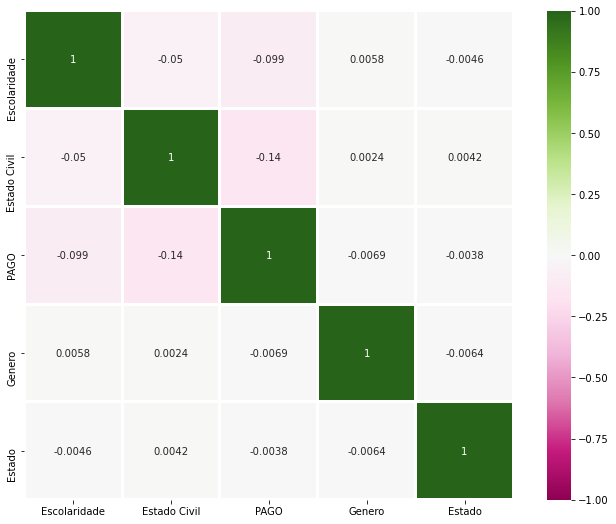

In [9]:
# Vamos ver se existe alguma correlação entre os valores categóricos
corr_categoricos = df[categoricos].corr()
plt.figure(figsize=(12.,9))
sns.heatmap(corr_categoricos, vmin=-1, vmax=1, cmap="PiYG",square=True, annot=True, linewidths=2)

<AxesSubplot:>

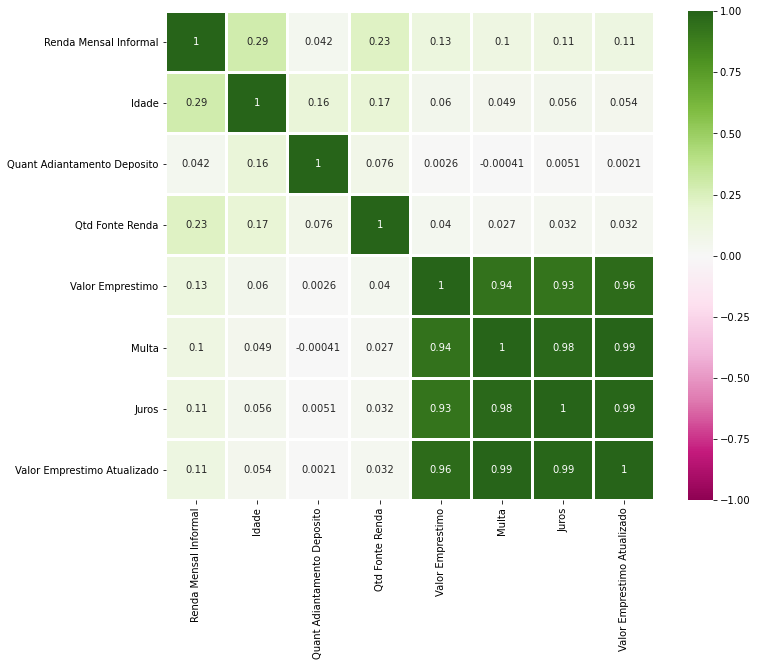

In [10]:
# Vamos ver se existe alguma correlação entre os valores não categóricos
corr_nao_categoricos = df[nao_categoricos].corr()
plt.figure(figsize=(12.,9))
sns.heatmap(corr_nao_categoricos, vmin=-1, vmax=1, cmap="PiYG",square=True, annot=True, linewidths=2)

Vemos que não existe correlação entre as colunas categóricas, mas existe correlação entre diversas das colunas não categóricas. E evidentemente, a correlação entre os não categóricos é maior quando consideramos todo o dataframe.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


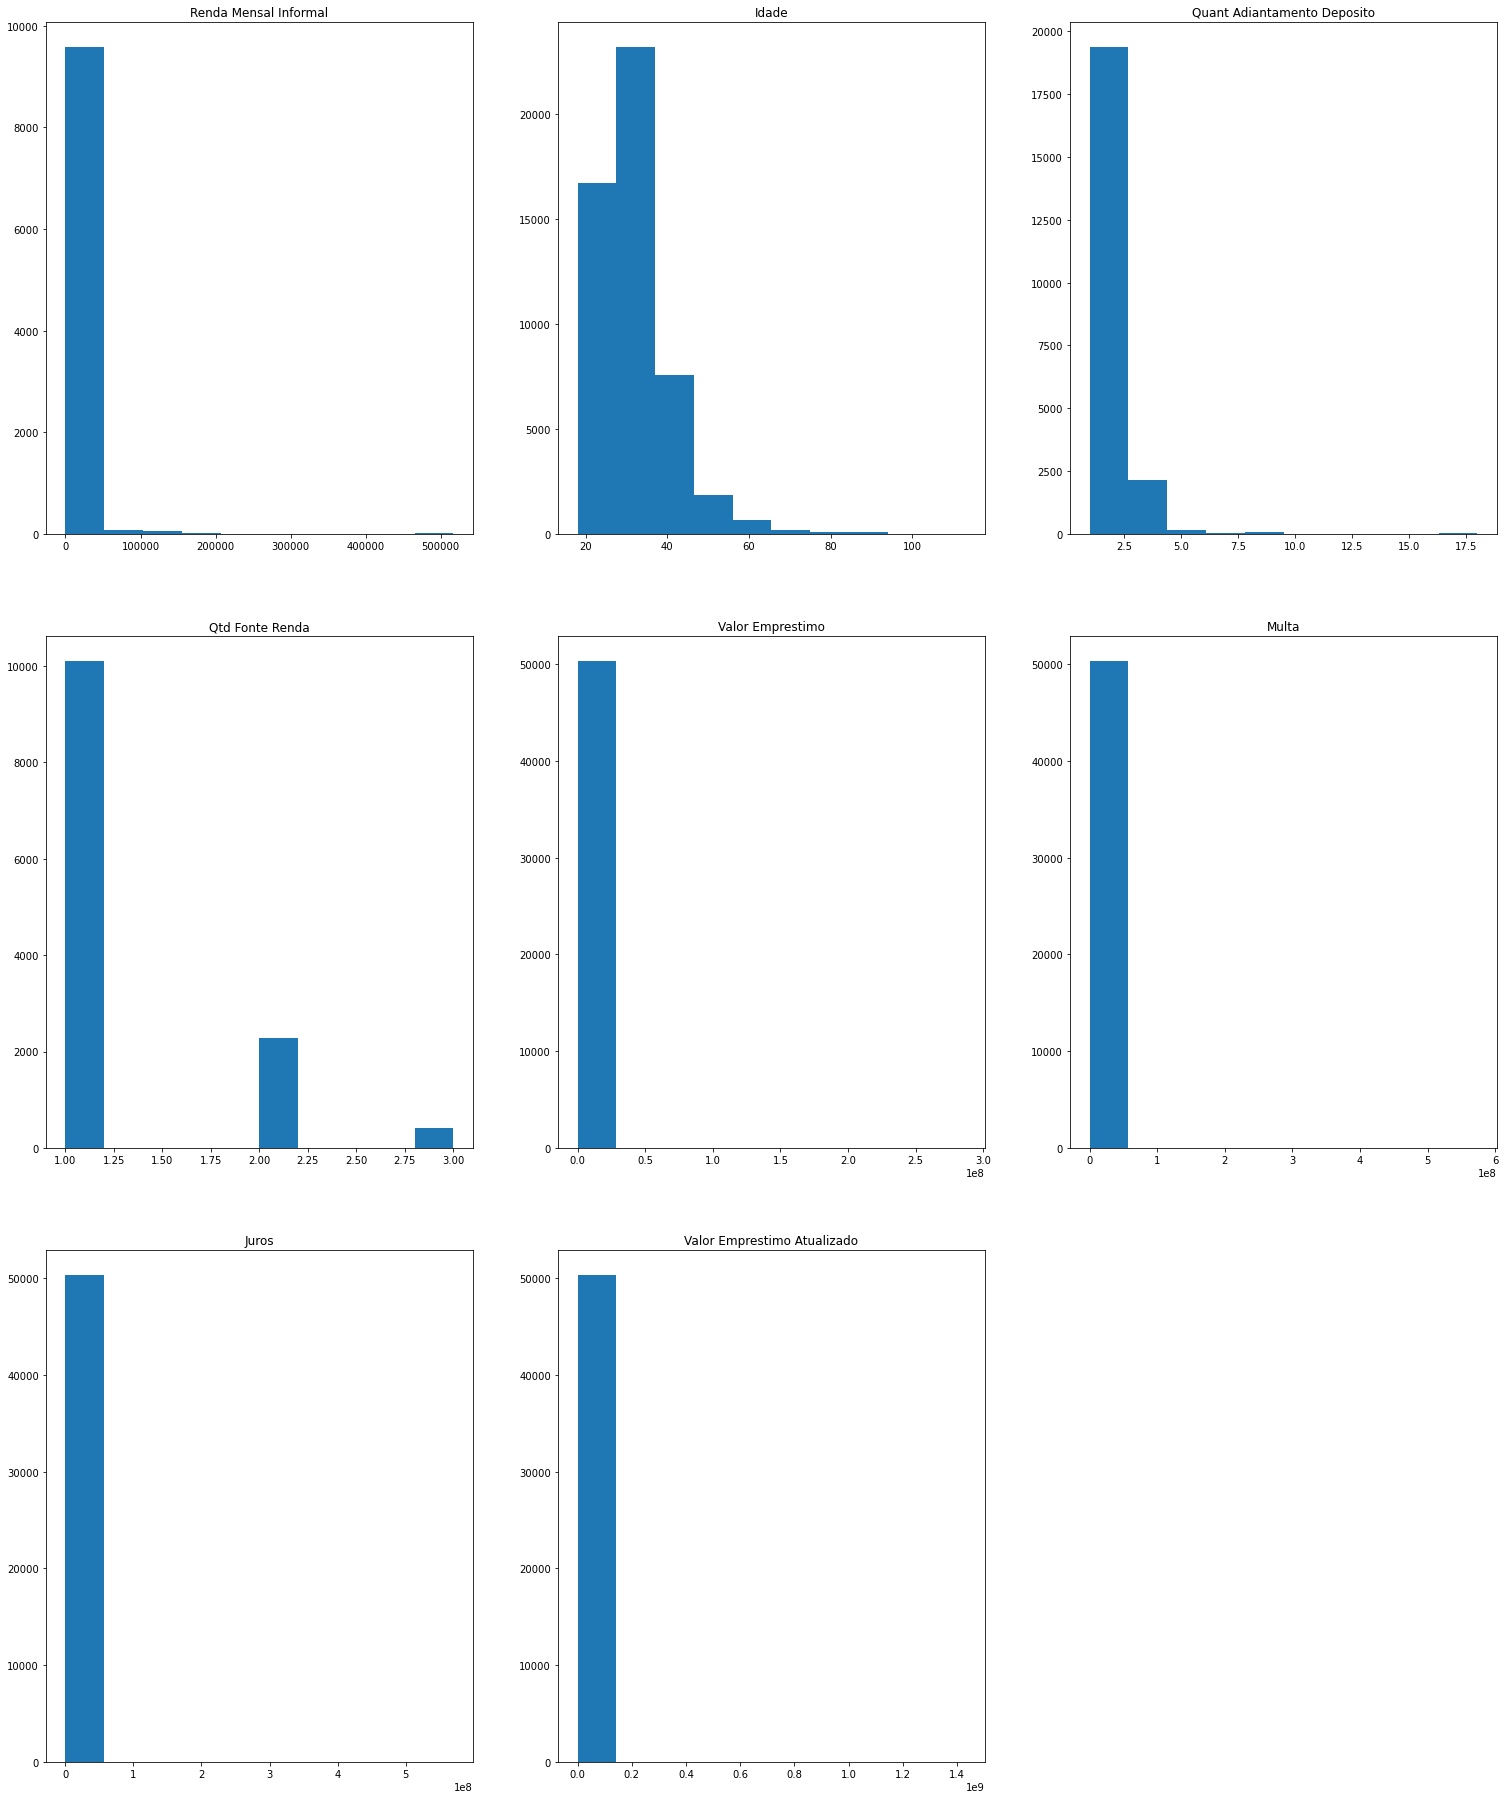

In [11]:
# Agora vamos ver como funciona a distribuição dos valores não categóricos:
plt.figure(figsize=(26,32))

plot_number=1
for i in range(8):   
    ax = plt.subplot(3, 3, plot_number)
    ax.set_title(df[nao_categoricos].columns[i])
    plt.hist(df[df[nao_categoricos].columns[i]])
    
    plot_number+=1

Encontramos outliers em todas as variáveis não categóricas. Sendo necessário um futuro tratamento dos mesmos.

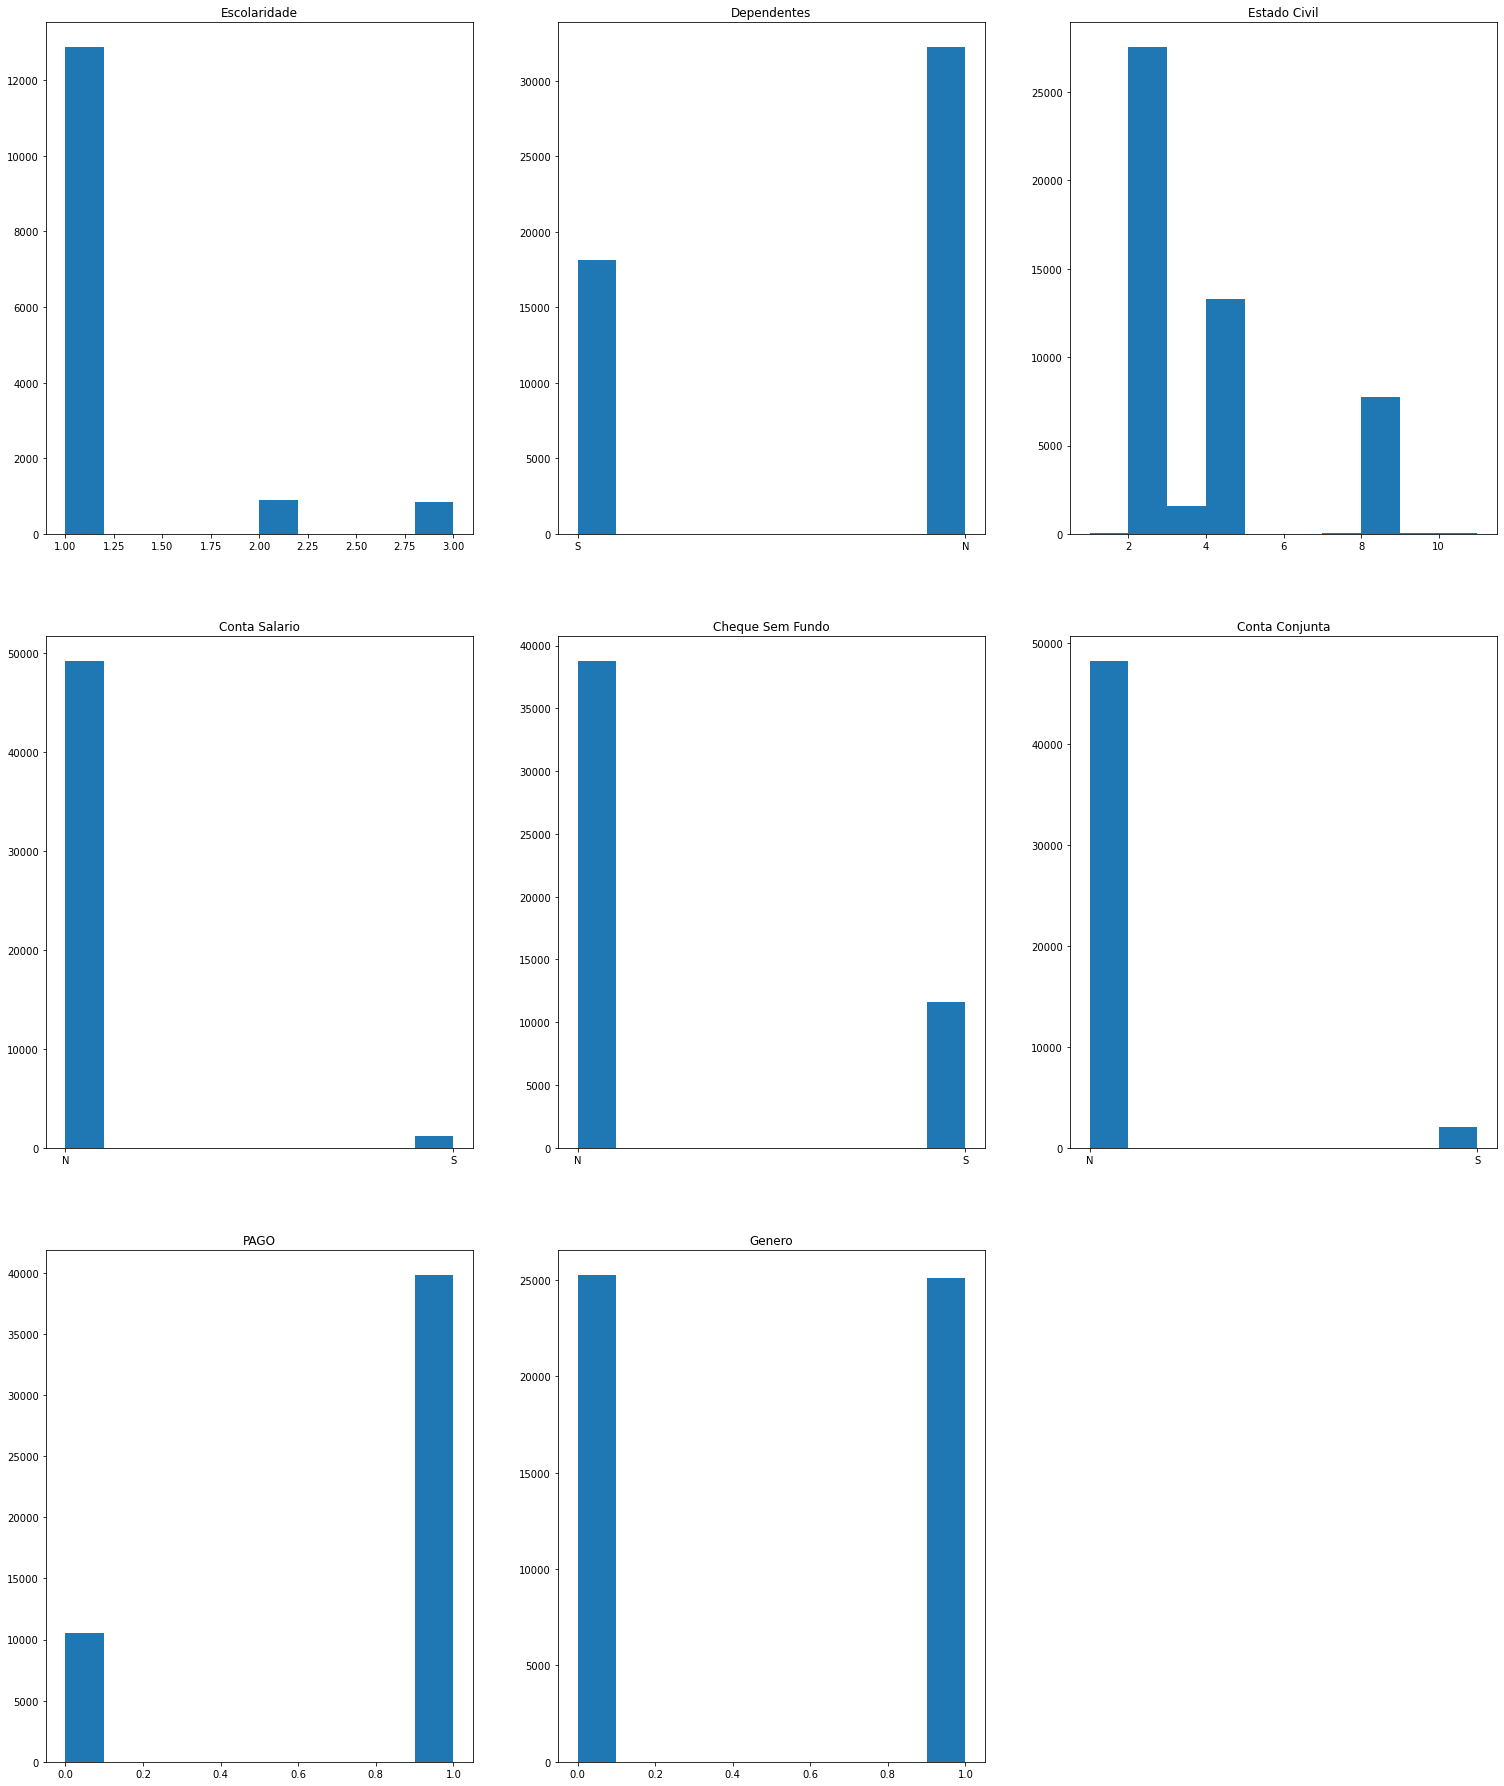

In [12]:
# Agora vamos ver como funciona a distribuição dos valores categóricos:
plt.figure(figsize=(26,32))

plot_number=1
for i in range(8):   
    ax = plt.subplot(3, 3, plot_number)
    ax.set_title(df[categoricos].columns[i])
    plt.hist(df[df[categoricos].columns[i]])
    
    plot_number+=1

Já os categóricos tem distribuição mais equilibrada, sendo pouco ou nenhum outlier

##### Apresente e discuta eventuais relações entre as variáveis, tais como dependência, correlação, informação mútua, associações etc.;

Tenho uma teoria sobre a relação entre estado civil e valores de empréstimo, porém categorizando todas as opções de casados como "casados". Para isso, substituirei as classificações "4, 8, 3" por "5".

In [13]:
# Fazendo a substituição
df['Estado Civil_2']=df['Estado Civil']
df['Estado Civil_2'].replace([4,8,3],[5,5,5], inplace=True)

<AxesSubplot:>

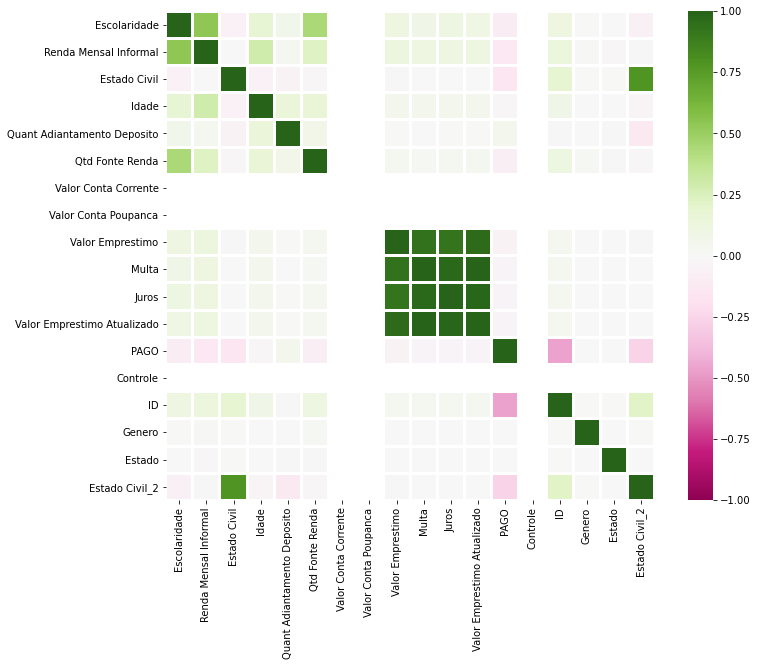

In [14]:
corr_nao_categoricos = df[nao_categoricos].corr()
plt.figure(figsize=(12.,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="PiYG",square=True, linewidths=2)

No caso a teoria se provou falsa, pois a correlação teve uma variação muito pequena em relação ao formato inicial.

##### Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados;

Anteriormente verificamos que algumas colunas tem alto índice de valores nulos. Agora vamos verificar qual o tamanho do Dataframe com 100% dos valores preenchidos:

In [15]:
print("Após deletarmos os dados nulos, o DataFrame passa a ter o formato: ", df.dropna().shape)

Após deletarmos os dados nulos, o DataFrame passa a ter o formato:  (0, 24)


Sendo assim, o formato final é menor que os valores categóricos e/ou não categóricos individualmente. Algo que, novamente, justifica a diferença nas correlações quando analisamos os daods juntos e separados.

#####  Examine e discuta o impacto de cada variável na base de dados na previsão da inadimplência do cliente, elencando quais variáveis são aparentemente mais importantes a definição de bom ou mal pagador;

Seguindo uma lógica baseada no conhecimento empírico, farei um estudo sobre a relação de Escolaridade, Renda Informal, Dependentes e Estado Civil com o histórico de inadimplência.

In [17]:
df_pago = df[df['PAGO']==1]

In [19]:
df_nao_pago = df[df['PAGO']==0]

In [20]:
df_pago.describe(include='all')

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado,Estado Civil_2
count,12930.000000,8562.000000,39853,39853.000000,39853.000000,39853,39853,16749.000000,11237.000000,39853,...,3.985300e+04,3.985300e+04,3.985300e+04,39853.0,39853.0,3.985300e+04,39853.000000,39853,39853.000000,39853.000000
unique,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,N,NaN,NaN,S,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,NaN,NaN
freq,NaN,NaN,23469,NaN,NaN,34054,38996,NaN,NaN,29352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39853,NaN,NaN
mean,1.157463,3409.860346,NaN,3.346147,31.628259,NaN,NaN,2.131829,1.225772,NaN,...,6.092306e+03,1.275603e+04,3.109389e+04,1.0,1.0,2.032763e+09,0.496550,NaN,57.495872,3.159260
std,0.484855,19668.372327,NaN,2.127014,8.319935,NaN,NaN,0.953759,0.479577,NaN,...,1.399132e+05,3.236843e+05,6.211250e+05,0.0,0.0,5.655180e+09,0.499994,NaN,1.118321,1.484945
min,1.000000,0.009600,NaN,1.000000,18.000000,NaN,NaN,1.000000,1.000000,NaN,...,0.000000e+00,0.000000e+00,1.441500e+03,1.0,1.0,1.168846e+06,0.000000,NaN,56.000000,1.000000
25%,1.000000,26.820000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.000000,NaN,...,1.007600e+02,2.309700e+02,2.621520e+03,1.0,1.0,1.376467e+06,0.000000,NaN,56.000000,2.000000
50%,1.000000,170.748100,NaN,2.000000,30.000000,NaN,NaN,2.000000,1.000000,NaN,...,4.034500e+02,9.002400e+02,4.826890e+03,1.0,1.0,1.417438e+06,0.000000,NaN,57.000000,2.000000
75%,1.000000,980.184900,NaN,4.000000,35.000000,NaN,NaN,2.000000,1.000000,NaN,...,1.845990e+03,3.496010e+03,1.242156e+04,1.0,1.0,1.485097e+06,1.000000,NaN,58.000000,5.000000


In [21]:
df_nao_pago.describe(include='all')

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado,Estado Civil_2
count,1685.000000,1206.000000,10537,10537.000000,10537.000000,10537,10537,5094.000000,1569.000000,10537,...,1.053700e+04,1.053700e+04,1.053700e+04,10537.0,10537.0,1.053700e+04,10537.000000,10537,10537.000000,10537.000000
unique,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,N,NaN,NaN,S,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,NaN,NaN
freq,NaN,NaN,8779,NaN,NaN,8676,10215,NaN,NaN,9447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10537,NaN,NaN
mean,1.314540,13337.827903,NaN,4.097941,32.088640,NaN,NaN,2.016490,1.355003,NaN,...,2.649730e+05,2.618983e+05,7.057855e+05,0.0,1.0,1.020107e+10,0.505077,NaN,57.506311,4.150707
std,0.648996,46268.902793,NaN,2.044747,9.426539,NaN,NaN,0.678499,0.589699,NaN,...,6.209208e+06,5.928806e+06,1.537677e+07,0.0,0.0,8.805402e+09,0.499998,NaN,1.116838,1.445369
min,1.000000,0.100000,NaN,1.000000,18.000000,NaN,NaN,1.000000,1.000000,NaN,...,0.000000e+00,0.000000e+00,1.483880e+03,0.0,1.0,1.231789e+06,0.000000,NaN,56.000000,1.000000
25%,1.000000,49.265425,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.000000,NaN,...,1.029500e+03,6.668500e+02,4.346500e+03,0.0,1.0,4.695511e+07,0.000000,NaN,57.000000,2.000000
50%,1.000000,497.372800,NaN,4.000000,30.000000,NaN,NaN,2.000000,1.000000,NaN,...,5.715820e+03,5.134170e+03,1.706582e+04,0.0,1.0,1.681269e+10,1.000000,NaN,58.000000,5.000000
75%,1.000000,3789.937650,NaN,4.000000,35.000000,NaN,NaN,2.000000,2.000000,NaN,...,3.614352e+04,3.738521e+04,6.859061e+04,0.0,1.0,1.694851e+10,1.000000,NaN,59.000000,5.000000


In [22]:
df_pago['Estado Civil_2'].value_counts(normalize=True)

2     0.614132
5     0.382681
1     0.001531
11    0.001029
7     0.000452
9     0.000176
Name: Estado Civil_2, dtype: float64

In [23]:
df_nao_pago['Estado Civil_2'].value_counts(normalize=True)

5     0.698301
2     0.293347
11    0.003132
9     0.002467
7     0.002183
1     0.000569
Name: Estado Civil_2, dtype: float64

Analisando os dados acima, vemos que o público com inadimplência tende a ser casado e ter maior fonte de renda informal.